In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation --> this is inefficient and expensive

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules
from sklearn.linear_model import LogisticRegression as LR
from sklearn import svm #might take a while 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #probably not worth it 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #probably not worth it
import xgboost as xgb #gradient boosting #probably not worth it
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Warnings
import warnings
warnings.filterwarnings("ignore")

#show me what you got
pd.set_option("display.max_rows", None, "display.max_columns", None)

import terality as te

You are using version 0.12.18 of the Terality client, but version 0.12.25 is available. Consider upgrading your version to get the latest fixes and features.


## Goal: Two Ideas (go with whatever works better)
### 1: Predict/Classify when a person will die (use injury level = fatality column)

#### i.e., Given that an individual is involved in a traffic accident, what predicts if that individual will die??

In [ ]:
# run the model interpretation with the variables we see it choosing

In [2]:
data = pd.read_csv("General_Clean_2019")

In [3]:
Use = data[[    
    'STATENAME_x',
    'DAY_x',
    'MONTHNAME_x', 
    'HOUR_x',
    'MINUTE_x',
    'NUMOCCS',
    'HARM_EVNAME_x',
    'MAN_COLLNAME_x',
    'REG_STATNAME', 
    'MAKENAME_x',
    'MAK_MODNAME',
    'BODY_TYP_x',
    'MOD_YEARNAME_x',
    'GVWRNAME',
    'V_CONFIGNAME',
    'TRAV_SPNAME', 
    'ROLLOVERNAME_x',
    'ROLINLOCNAME',
    'IMPACT1NAME_x',
    'DEFORMEDNAME',
    'VEH_SC1NAME',
    'VEH_SC2NAME', 
    'L_COMPLNAME',
    'L_RESTRINAME',
    'FIRST_YRNAME', 
    'LAST_YR',
    'SPEEDRELNAME',
    'DR_SF1NAME',
    'DR_SF2NAME',
    'DR_SF3NAME',
    'DR_SF4NAME',
    'VTRAFWAYNAME',
    'VNUM_LANNAME',
    'VSPD_LIMNAME', 
    'VALIGNNAME',
    'VPROFILENAME',
    'VPAVETYPNAME',
    'VSURCONDNAME',
    'VTRAFCONNAME',
    'VTCONT_FNAME',
    'P_CRASH1NAME',
    'P_CRASH2NAME',
    'P_CRASH3NAME',
    'PCRASH4NAME',
    'PCRASH5NAME',
    'ACC_TYPENAME',
    'DR_DRINKNAME',
    'RUR_URBNAME_x',
    'FUNC_SYSNAME_x',
    'AGE', 
    'SEXNAME',
    'PER_TYPNAME',
    'INJ_SEVNAME',
    'SEAT_POSNAME',
    'REST_USENAME',
    'REST_MISNAME',
    'AIR_BAGNAME',
    'DRINKINGNAME',
    'DRUGSNAME',
    'P_SF1NAME',
    'P_SF2NAME',
    'P_SF3NAME',
    'LOCATIONNAME',
    'PERMVIT',
    'PERNOTMVIT',
    'DAY_WEEKNAME',
    'ROUTENAME',
    'RD_OWNERNAME',
    'TYP_INTNAME',
    'WRK_ZONENAME',
    'REL_ROADNAME',
    'LGT_CONDNAME',
    'WEATHER1NAME',
    'WEATHER2NAME',
    'WEATHERNAME',
    'HELM_USENAME',
    'CF1NAME',
    'CF2NAME',
    "CF3NAME",
    'RAILNAME',
    'PREV_ACCNAME',
    'PREV_SUS1',
    'PREV_SUS2',
    'PREV_SUS3',
    'PREV_DWI',
    'PREV_SPD',
    'PREV_OTH',
    "DRUNK_DR"]]

In [4]:
df_dummies = pd.get_dummies(Use,columns=[
    'STATENAME_x',
    'NUMOCCS',
    'DAY_x',
    'MONTHNAME_x', 
    'HOUR_x',
    'MINUTE_x',
    'HARM_EVNAME_x',
    'MAN_COLLNAME_x',
    'REG_STATNAME', 
    'MAKENAME_x',
    'MAK_MODNAME',
    'BODY_TYP_x',
    'MOD_YEARNAME_x',
    'GVWRNAME',
    'V_CONFIGNAME',
    'TRAV_SPNAME', 
    'ROLLOVERNAME_x',
    'ROLINLOCNAME',
    'IMPACT1NAME_x',
    'DEFORMEDNAME',
    'VEH_SC1NAME',
    'VEH_SC2NAME', 
    'L_COMPLNAME',
    'L_RESTRINAME',
    'FIRST_YRNAME', 
    'LAST_YR',
    'SPEEDRELNAME',
    'DR_SF1NAME',
    'DR_SF2NAME',
    'DR_SF3NAME',
    'DR_SF4NAME',
    'VTRAFWAYNAME',
    'VNUM_LANNAME',
    'VSPD_LIMNAME', 
    'VALIGNNAME',
    'VPROFILENAME',
    'VPAVETYPNAME',
    'VSURCONDNAME',
    'VTRAFCONNAME',
    'VTCONT_FNAME',
    'P_CRASH1NAME',
    'P_CRASH2NAME',
    'P_CRASH3NAME',
    'PCRASH4NAME',
    'PCRASH5NAME',
    'ACC_TYPENAME',
    'DR_DRINKNAME', 
    'RUR_URBNAME_x',
    'FUNC_SYSNAME_x',
    'SEXNAME',
    'PER_TYPNAME',
    'INJ_SEVNAME',
    'SEAT_POSNAME',
    'REST_USENAME',
    'REST_MISNAME',
    'AIR_BAGNAME',
    'DRINKINGNAME',
    'DRUGSNAME',
    'P_SF1NAME',
    'P_SF2NAME',
    'P_SF3NAME',
    'LOCATIONNAME',
    'DAY_WEEKNAME',
    'ROUTENAME',
    'RD_OWNERNAME',
    'TYP_INTNAME',
    'WRK_ZONENAME',
    'REL_ROADNAME',
    'HELM_USENAME',
    'LGT_CONDNAME',
    'WEATHER1NAME',
    'WEATHER2NAME',
    'WEATHERNAME',
    'CF1NAME',
    'PERMVIT',
    'PERNOTMVIT',
    'CF2NAME',
    "CF3NAME",
    'RAILNAME',
    'PREV_ACCNAME',
    'PREV_SUS1',
    'PREV_SUS2',
    'PREV_SUS3',
    'PREV_DWI',
    'PREV_SPD',
    'PREV_OTH',
    "DRUNK_DR" ])


In [5]:
#drop other types of injury outcomes because there's perfect multicollinearity "INJ_SEVNAME_Died Prior to Crash*", "INJ_SEVNAME_Injured, Severity Unknown", "INJ_SEVNAME_No Apparent Injury (O)", "NJ_SEVNAME_Possible Injury (C)" "INJ_SEVNAME_Suspected Minor Injury (B)" "INJ_SEVNAME_Suspected Serious Injury (A)", "INJ_SEVNAME_Unknown/Not Reported"
df_dummies.drop(columns=['INJ_SEVNAME_Died Prior to Crash*', "INJ_SEVNAME_Injured, Severity Unknown", "INJ_SEVNAME_No Apparent Injury (O)", "INJ_SEVNAME_Possible Injury (C)", "INJ_SEVNAME_Suspected Minor Injury (B)", "INJ_SEVNAME_Suspected Serious Injury (A)", "INJ_SEVNAME_Unknown/Not Reported"], axis=1, inplace=True)


df_dummies = df_dummies.dropna()

Y = df_dummies[["INJ_SEVNAME_Fatal Injury (K)"]]       
X = df_dummies.drop(columns=["INJ_SEVNAME_Fatal Injury (K)"])
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = .75, random_state=123)

In [6]:
df_dummies.head() 

AGE  STATENAME_x_Alabama  STATENAME_x_Alaska  STATENAME_x_Arizona  \
0  34.0                    1                   0                    0   
1  53.0                    1                   0                    0   
2  59.0                    1                   0                    0   
3  42.0                    1                   0                    0   
4  54.0                    1                   0                    0   

   STATENAME_x_Arkansas  STATENAME_x_California  STATENAME_x_Colorado  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   STATENAME_x_Connecticut  STATENAME_x_Delaware  \
0                        0                     0   
1                        0                     0   
2                        0                     0   
3                        0                     0   
4                        0                     0   

   STATENAME_x_District of Columbia  STATENAME_x_Florida  STATENAME_x_Georgia  \
0                                 0                    0                    0   
1                                 0                    0                    0   
2                                 0                    0                    0   
3                                 0                    0                    0   
4                                 0                    0                    0   

   STATENAME_x_Hawaii  STATENAME_x_Idaho  STATENAME_x_Illinois  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   
3                   0                  0                     0   
4                   0                  0                     0   

   STATENAME_x_Indiana  STATENAME_x_Iowa  STATENAME_x_Kansas  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   STATENAME_x_Kentucky  STATENAME_x_Louisiana  STATENAME_x_Maine  \
0                     0                      0                  0   
1                     0                      0                  0   
2                     0                      0                  0   
3                     0                      0                  0   
4                     0                      0                  0   

   STATENAME_x_Maryland  STATENAME_x_Massachusetts  STATENAME_x_Michigan  \
0                     0                          0                     0   
1                     0                          0                     0   
2                     0                          0                     0   
3                     0                          0                     0   
4                     0                          0                     0   

   STATENAME_x_Minnesota  STATENAME_x_Mississippi  STATENAME_x_Missouri  \
0                      0                        0                     0   
1                      0                        0                     0   
2                      0                        0                     0   
3                      0                        0                     0   
4                      0                        0                     0   

   STATENAME_x_Montana  STATENAME_x_Nebraska  STATENAME_x_Nevada  \
0                    0                     0                   0   
1                    0                     0                   0   
2                

In [7]:
df_dummies.shape

(82220, 2851)

In [8]:
#pre-processing
# Scale data 
scaler = pp.MinMaxScaler()
col_names = list(test_X)
test_X = scaler.fit_transform(test_X)

# Convert back into data frame
test_X = pd.DataFrame(test_X,columns=col_names)

# Scale test data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)

In [9]:
use_metrics = ["neg_mean_squared_error"]

In [10]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [11]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [12]:
## Please note: I commented out the models which were less predictive so I could run the logit faster

search_space = [
    
    # NaiveBayes
    #{'model': [NB()]},
    
    # Logistic Regression
    {'model' : [LR()]},
    
    # KNN with K tuning param
    #{'model' : [KNN()],
    #'model__n_neighbors':[5,10,25,50, 75, 100, 200]},
        
    # Decision Tree with the Max Depth Param
    #{'model': [DT()],
    #'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    #{'model' : [RF()],
    #'model__max_depth':[2,3,4],
    #'model__n_estimators':[500,1000,1500]},
    
    #Gradient Boosting Classifier
    #{'model' : [GradientBoostingClassifier()],
    #'model__max_depth':[3, 7, 9],
    #'model__n_estimators':[10, 100, 1000],
    #'model__learning_rate':[0.001, 0.01, 0.1],
    #'model__subsample':[.5, .7, 1.0]}
    
    # SVM
    #{'model' : [svm()],
    #'C' : [0,1, 1, 10, 100],
    #'gamma': [1, 0.1, 0.01, 0.001],
    #'kernel': ['rbf', 'poly', 'linear'],
    #'class_weight': ['balanced']}
    
]

In [13]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [14]:
search.fit(train_X,train_Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4, param_grid=[{'model': [LogisticRegression()]}],
             scoring='roc_auc')

In [15]:
search.best_score_

0.9201356050084243

In [16]:
search.best_params_

{'model': LogisticRegression()}

In [17]:
rf_mod = search.best_estimator_

In [18]:
m.roc_auc_score(train_Y,rf_mod.predict_proba(train_X)[:,1])

0.9471690073801384

In [19]:
#idk what this means and I don't rly care because I'm not focused on it!
m.accuracy_score(train_Y,rf_mod.predict(train_X))

0.8673801994648505

##### ROC Curve: Visualizing Training Data

In [20]:
lr = LR()
lr.fit(train_X, train_Y)
y_pred = lr.predict(train_X)
m.accuracy_score(train_Y,y_pred)
m.roc_auc_score(train_Y,y_pred)
probs = lr.predict_proba(train_X)
probs =  pd.DataFrame(probs,columns=lr.classes_)
probs.head()

,0,1
0,0.675444,0.324556
1,0.897543,0.102457
2,0.999938,0.000062
3,0.765061,0.234939
4,0.709225,0.290775


In [21]:
False_Positive_Rate, True_Positive_Rate, thresholds = m.roc_curve(train_Y, probs[1])

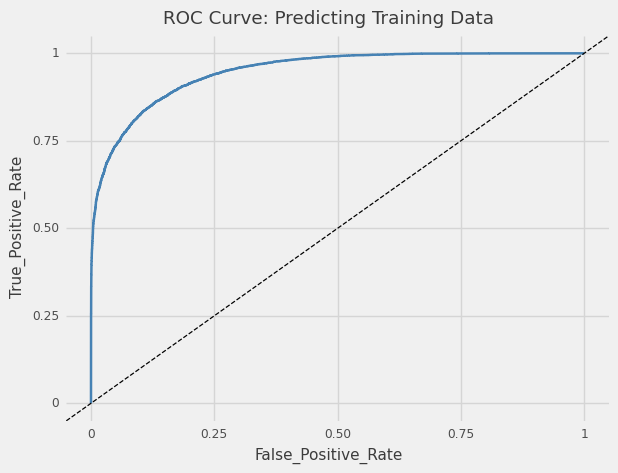

<ggplot: (137319411056)>

In [22]:
# Plot the ROC Curve
( 
    ggplot(pd.DataFrame(dict(False_Positive_Rate=False_Positive_Rate,True_Positive_Rate=True_Positive_Rate)),
           aes(x="False_Positive_Rate",y="True_Positive_Rate")) +
    geom_path(color="steelblue",size=1) +
    geom_abline(intercept=0,slope=1,linetype="dashed") +
    theme_minimal() +
    labs(title="ROC Curve: Predicting Training Data") +
    theme_538() + theme(figure_size=(7,5))
)

### Model Interpretation

#### Global Surrogate Model

In [29]:
pr_y = rf_mod.predict_proba(train_X)[:,rf_mod.classes_ == 1]

In [34]:
surrogate_model = DT_reg(max_depth=3)
surrogate_model.fit(train_X,pr_y)

DecisionTreeRegressor(max_depth=3)

In [35]:
m.r2_score(pr_y,surrogate_model.predict(train_X)).round(2)

0.62

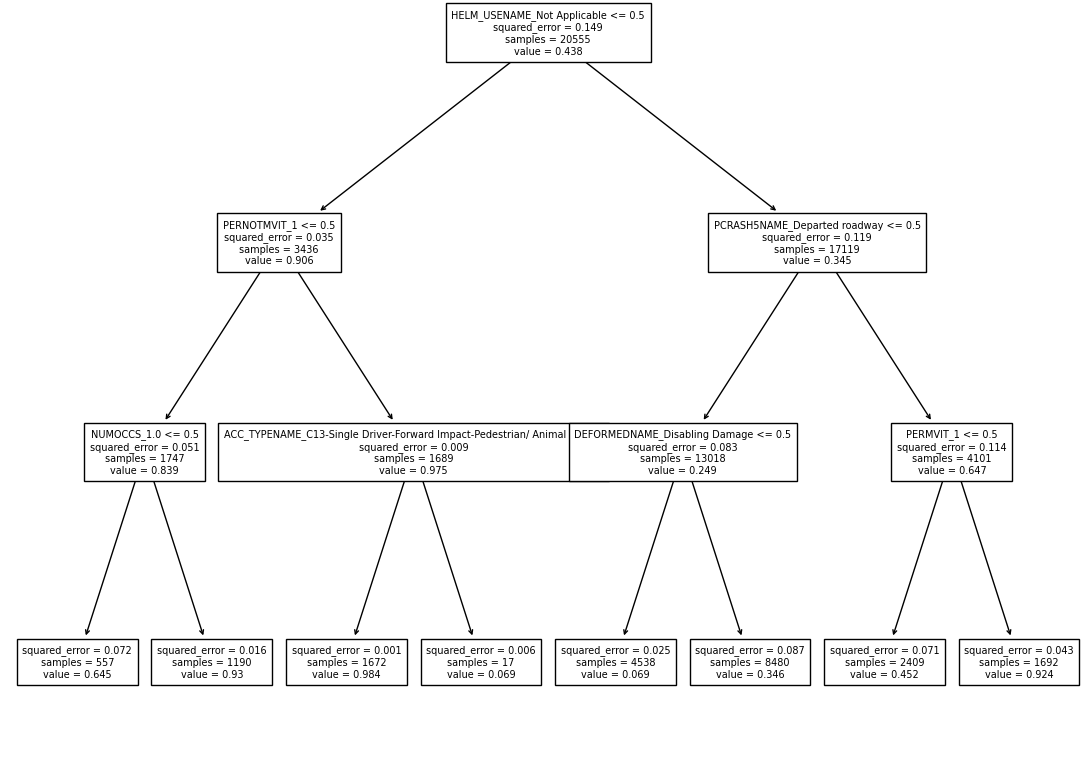

In [39]:
plt.figure(figsize=(10,8),dpi=100)
rules = tree.plot_tree(surrogate_model,feature_names=train_X.columns,fontsize=7)

In [43]:
Use.head()

,STATENAME_x,DAY_x,MONTHNAME_x,HOUR_x,MINUTE_x,NUMOCCS,HARM_EVNAME_x,MAN_COLLNAME_x,REG_STATNAME,MAKENAME_x,MAK_MODNAME,BODY_TYP_x,MOD_YEARNAME_x,GVWRNAME,V_CONFIGNAME,TRAV_SPNAME,ROLLOVERNAME_x,ROLINLOCNAME,IMPACT1NAME_x,DEFORMEDNAME,VEH_SC1NAME,VEH_SC2NAME,L_COMPLNAME,L_RESTRINAME,FIRST_YRNAME,LAST_YR,SPEEDRELNAME,DR_SF1NAME,DR_SF2NAME,DR_SF3NAME,DR_SF4NAME,VTRAFWAYNAME,VNUM_LANNAME,VSPD_LIMNAME,VALIGNNAME,VPROFILENAME,VPAVETYPNAME,VSURCONDNAME,VTRAFCONNAME,VTCONT_FNAME,P_CRASH1NAME,P_CRASH2NAME,P_CRASH3NAME,PCRASH4NAME,PCRASH5NAME,ACC_TYPENAME,DR_DRINKNAME,RUR_URBNAME_x,FUNC_SYSNAME_x,AGE,SEXNAME,PER_TYPNAME,INJ_SEVNAME,SEAT_POSNAME,REST_USENAME,REST_MISNAME,AIR_BAGNAME,DRINKINGNAME,DRUGSNAME,P_SF1NAME,P_SF2NAME,P_SF3NAME,LOCATIONNAME,PERMVIT,PERNOTMVIT,DAY_WEEKNAME,ROUTENAME,RD_OWNERNAME,TYP_INTNAME,WRK_ZONENAME,REL_ROADNAME,LGT_CONDNAME,WEATHER1NAME,WEATHER2NAME,WEATHERNAME,HELM_USENAME,CF1NAME,CF2NAME,CF3NAME,RAILNAME,PREV_ACCNAME,PREV_SUS1,PREV_SUS2,PREV_SUS3,PREV_DWI,PREV_SPD,PREV_OTH,DRUNK_DR
0,Alabama,7.0,February,12.0,54.0,2.0,Motor Vehicle In-Transport,Front-to-Rear,Georgia,Toyota,Toyota Camry,4.0,2009,Not Applicable,Not Applicable,Reported as Unknown,No Rollover,No Rollover,12 Clock Point,Disabling Damage,None,None,Not licensed,No Restrictions or Not Applicable,2015,2018.0,"Yes, Exceeded Speed Limit",Reported as Unknown,Reported as Unknown,Reported as Unknown,Reported as Unknown,"Two-Way, Divided, Positive Median Barrier",Two lanes,70 MPH,Straight,Level,"Blacktop, Bituminous, or Asphalt",Dry,No Controls,No Controls,Going Straight,Traveling in same direction with lower steady ...,No Avoidance Maneuver,Tracking,Stayed in original travel lane,"D24-Same Trafficway, Same Direction-Rear End-S...",No,Urban,Interstate,34.0,Female,Driver of a Motor Vehicle In-Transport,Suspected Serious Injury (A),"Front Seat, Left Side",Shoulder and Lap Belt Used,No Indication of Mis-Use,Deployed- Front,No (Alcohol Not Involved),No (drugs not involved),None,None,None,Occupant of a Motor Vehicle,3,0,Thursday,Interstate,State Highway Agency,Not an Intersection,None,On Roadway,Daylight,Clear,No Additional Atmospheric Conditions,Clear,Not Applicable,None,None,None,Not Applicable,Crashes Not Reported on Driving Record,0.0,0.0,1.0,0.0,0.0,2.0,1
1,Alabama,7.0,February,12.0,54.0,2.0,Motor Vehicle In-Transport,Front-to-Rear,Georgia,Toyota,Toyota Camry,4.0,2009,Not Applicable,Not Applicable,Reported as Unknown,No Rollover,No Rollover,12 Clock Point,Disabling Damage,None,None,Not licensed,No Restrictions or Not Applicable,2015,2018.0,"Yes, Exceeded Speed Limit",Reported as Unknown,Reported as Unknown,Reported as Unknown,Reported as Unknown,"Two-Way, Divided, Positive Median Barrier",Two lanes,70 MPH,Straight,Level,"Blacktop, Bituminous, or Asphalt",Dry,No Controls,No Controls,Going Straight,Traveling in same direction with lower steady ...,No Avoidance Maneuver,Tracking,Stayed in original travel lane,"D24-Same Trafficway, Same Direction-Rear End-S...",No,Urban,Interstate,53.0,Male,Passenger of a Motor Vehicle In-Transport,Fatal Injury (K),"Second Seat, Right Side",Shoulder and Lap Belt Used,"Yes, Indication of Mis-Use",Not Deployed,Not Reported,Not Reported,None,None,None,Occupant of a Motor Vehicle,3,0,Thursday,Interstate,State Highway Agency,Not an Intersection,None,On Roadway,Daylight,Clear,No Additional Atmospheric Conditions,Clear,Not Applicable,None,None,None,Not Applicable,Crashes Not Reported on Driving Record,0.0,0.0,1.0,0.0,0.0,2.0,1
2,Alabama,7.0,February,12.0,54.0,1.0,Motor Vehicle In-Transport,Front-to-Rear,Georgia,Freightliner,Freightliner Medium/Heavy - CBE,64.0,2001,"10,001 lbs - 26,000 lbs",Single-Unit Truck (2- axle and GVWR more than ...,Reported as Unknown,No Rollover,No Rollover,6 Clock Point,Minor Damage,None,None,Valid license for this class vehicle,Restrictions Complied With,No Record,0.0,No,None,None,None,None,"Two-Way, Divided, Positive Median Barrier",Two lanes,70 MPH,Straight,Level,"Blacktop, Bituminous, or Asphalt",Dry,N